Building a Predictive Model for Bigmart on the Sales of each product at particular store. Bigmart will try to understand the properties of products and stores in increasing sales on the basis of this model.

In [63]:
# Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [64]:
data = pd.read_csv("C:\\Users\\kanch\\Downloads\\9961_14084_bundle_archive\\Train.csv")
# Loading the datset.

In [8]:
data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Basic Data Exploration

In [18]:
data.shape
# shows the number of rows and column in the dataset.

(8523, 12)

In [19]:
data.head()
# showing top five rows in the dataset.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
data.tail()
# showing the last five rows in the dataset.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [24]:
data.info()
#use to check the information about the data and its datatypes of its respective attributes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
#finding datatypes of each attribute in the data set.
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Exploratory Data Analysis
## Univariate Analysis

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

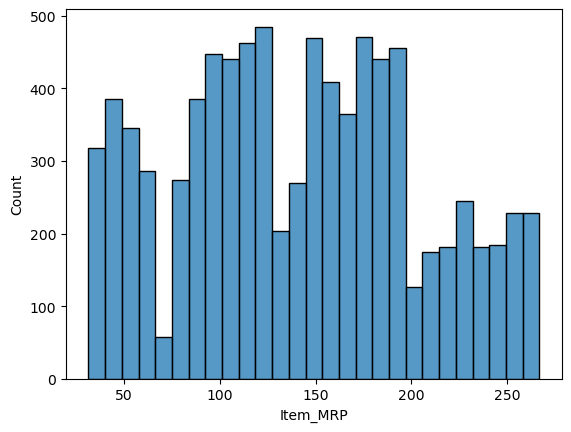

In [26]:
#Univariate Analysis is done on the basis of only one variables. It does not depend upon dependent and independent variables.
# first variable is Numerical variable - Item_MRP...to assess which product has highest count.Item_MRP could be considered to be imprtant variable too assess outlet_sale.
#for that drawing Histogram from Seaborn library.
sns.histplot(data["Item_MRP"])

In [30]:
#The above Histogram showing Bimodal Histogram. Item MRP ranging between 100- 200 showing maximum count.

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

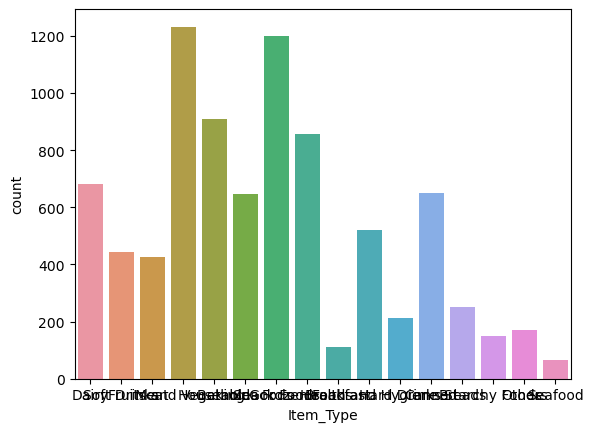

In [37]:
#Analysis for Categorical variable.Item_type can show us what products are most available in the stores. Count plot is plotted.
sns.countplot(data["Item_Type"])
data["Item_Type"].value_counts()

In [38]:
#Item_type Fruits and Vegetables has the highest count.Since on x axis the items were not visible, value_counts()method is used to show the exact counts.

# Bivariate Analysis

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

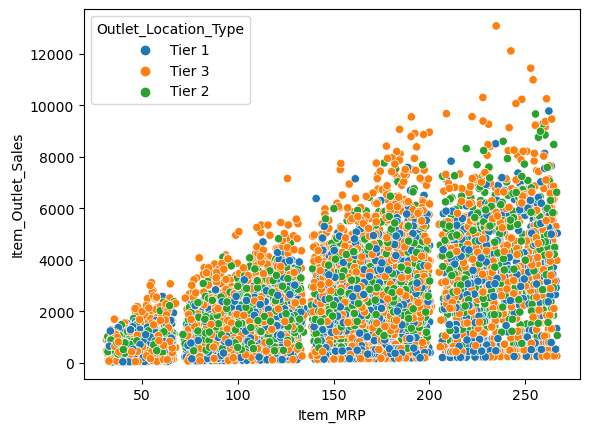

In [46]:
# The analysis is done taking two variables.Scatterplot can show us the correlation between item MRP and item outlet sales.
sns.scatterplot(data["Item_MRP"],data["Item_Outlet_Sales"],hue=data["Outlet_Location_Type"])

In [47]:
# Scatterplot shows items with MRP around 250 has highest sales and it is in Tier 3 location.FEw outliers are also seen.

# Feature Engineering
## Finding Missing Values

In [65]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [66]:
# Filling missing value with the next value.
data.fillna(method = "pad", inplace = True)

In [67]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [68]:
# checking missing values.
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Outlier Detection

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

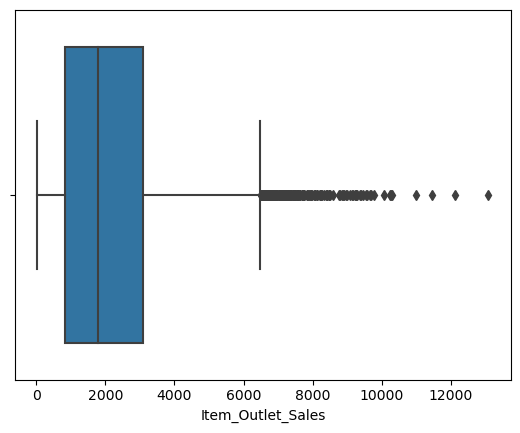

In [69]:
# Detection of outlier by plotting Boxplot
# Item_Visibility and Item_Outlet_Sales shows outliers.
sns.boxplot(data["Item_Outlet_Sales"])

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

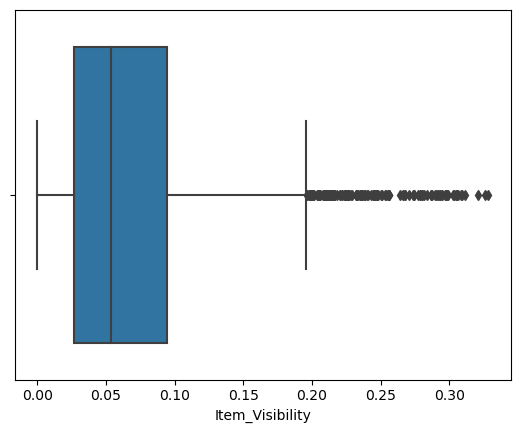

In [57]:
sns.boxplot(data["Item_Visibility"])

In [70]:
# REMOVING OUTLIERS WITH IQR METHOD.
Q1 = data.Item_Visibility.quantile(0.25)
Q3 = data.Item_Visibility.quantile(0.75)
Q1,Q3

(0.0269894775, 0.0945852925)

In [71]:
IQR = Q3-Q1
IQR

0.067595815

In [72]:
lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR
lower_limit,upper_limit

(-0.07440424500000001, 0.195979015)

In [ ]:
sns.boxplot(data["Item_Visibility"])

In [73]:
new_data = data[(data.Item_Visibility>lower_limit) & (data.Item_Visibility<upper_limit)]
new_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

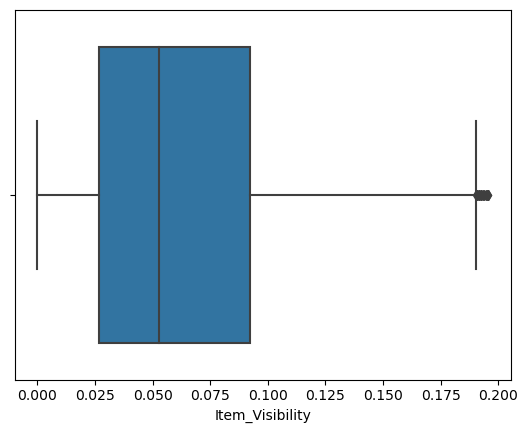

In [74]:
sns.boxplot(new_data["Item_Visibility"])# Outliers are removed from the Item Visibility column and store in new data set.

In [75]:
Q1 = new_data.Item_Outlet_Sales.quantile(0.25)
Q3 = new_data.Item_Outlet_Sales.quantile(0.75)
Q1,Q3

(874.8612, 3124.5994)

In [76]:
IQR = Q3-Q1
IQR

2249.7382

In [77]:
lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR
lower_limit,upper_limit

(-2499.7460999999994, 6499.2067)

In [78]:
new_data1 = new_data[(new_data.Item_Outlet_Sales>lower_limit) & (new_data.Item_Outlet_Sales<upper_limit)]
new_data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

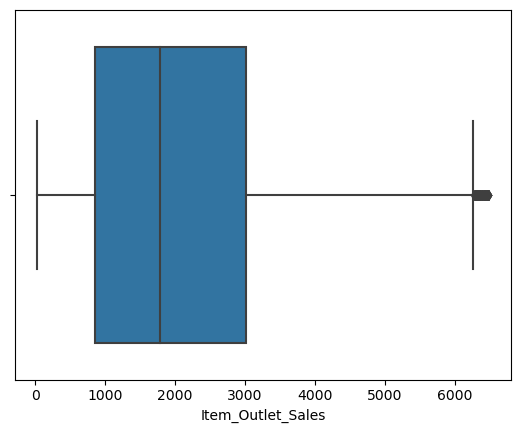

In [79]:
sns.boxplot(new_data1["Item_Outlet_Sales"])# outliers have been removed.

In [80]:
data = new_data1
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
data.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF" : "Low Fat","reg": "Regular"}},inplace = True)

C:\Users\kanch\AppData\Local\Temp\ipykernel_34292\2652036687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF" : "Low Fat","reg": "Regular"}},inplace = True)


In [83]:
data["Item_Fat_Content"].value_counts()

Low Fat    5309
Regular    2884
Name: Item_Fat_Content, dtype: int64

In [84]:
encoder = LabelEncoder()

In [85]:
data["Item_Identifier"] = encoder.fit_transform(data["Item_Identifier"])

C:\Users\kanch\AppData\Local\Temp\ipykernel_34292\2252068074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Identifier"] = encoder.fit_transform(data["Item_Identifier"])


In [86]:
data["Item_Fat_Content"] = encoder.fit_transform(data["Item_Fat_Content"])

C:\Users\kanch\AppData\Local\Temp\ipykernel_34292\2768578953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Fat_Content"] = encoder.fit_transform(data["Item_Fat_Content"])


In [87]:
data["Item_Type"] = encoder.fit_transform(data["Item_Type"])

C:\Users\kanch\AppData\Local\Temp\ipykernel_34292\4182992680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Type"] = encoder.fit_transform(data["Item_Type"])


In [88]:
data["Outlet_Identifier"] = encoder.fit_transform(data["Outlet_Identifier"])

C:\Users\kanch\AppData\Local\Temp\ipykernel_34292\3047573014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Outlet_Identifier"] = encoder.fit_transform(data["Outlet_Identifier"])


In [89]:
data["Outlet_Size"] = encoder.fit_transform(data["Outlet_Size"])

C:\Users\kanch\AppData\Local\Temp\ipykernel_34292\1064260363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Outlet_Size"] = encoder.fit_transform(data["Outlet_Size"])


In [90]:
data["Outlet_Location_Type"] = encoder.fit_transform(data["Outlet_Location_Type"])

C:\Users\kanch\AppData\Local\Temp\ipykernel_34292\4245023861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Outlet_Location_Type"] = encoder.fit_transform(data["Outlet_Location_Type"])


In [91]:
data["Outlet_Type"] = encoder.fit_transform(data["Outlet_Type"])

C:\Users\kanch\AppData\Local\Temp\ipykernel_34292\3155150246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Outlet_Type"] = encoder.fit_transform(data["Outlet_Type"])


In [92]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [93]:
# splitting features
X = data.drop(columns = "Item_Outlet_Sales", axis =1)
Y = data["Item_Outlet_Sales"]

In [94]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,0,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [95]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8193, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# Splitting data into training and testing data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

In [98]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7328,918,12.600,0,0.024195,4,36.1874,8,1997,2,0,1
5237,198,16.000,0,0.060971,15,226.2404,7,2002,1,1,1
7094,142,9.395,1,0.109713,14,41.3112,2,2007,2,1,1
6136,701,5.480,0,0.025288,5,83.3250,0,1998,1,2,0
8002,1472,17.250,0,0.113518,9,253.5724,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7516,1081,13.000,1,0.038314,6,109.9570,5,1985,1,2,3
306,205,7.475,0,0.148822,6,241.2854,7,2002,1,1,1
1875,866,14.500,1,0.106894,1,260.4594,0,1998,1,2,0
833,25,9.300,0,0.065189,14,181.1634,4,1985,2,0,0


In [57]:
Y_train.isnull().sum()

0

In [99]:
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Machine Learning Model Training

In [100]:
# Linear Regression model
from sklearn.linear_model import LinearRegression

In [101]:
model = LinearRegression()

In [102]:
model.fit(X_train, Y_train)

LinearRegression()

In [108]:
X_train_prediction = model.predict(X_train)
X_train_prediction

array([ 668.20687507, 3358.94316175,  319.33148352, ..., 2549.14031322,
       1679.21352362, 1303.58146268])

In [117]:
model.score(X_test,Y_test)

0.4854455761620833

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
model1 = RandomForestRegressor(n_estimators=40)

In [130]:
model1.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=40)

In [131]:
model1.score(X_test,Y_test)

0.5109173529337725

In [133]:
from Xgboost import XGBoostRegressor

ModuleNotFoundError: No module named 'Xgboost'